In [1]:
from dataAnal import clean_data
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = clean_data()

In [3]:
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [4]:
df["genres"] = df["genres"].astype('category')
df["genres"] = df["genres"].cat.codes

In [5]:
df.head()

,director_name,duration,gross,genres,movie_title,plot_keywords,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,178.0,760505847.0,0,Avatar,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,169.0,309404152.0,0,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000.0,2007.0,7.1,0
2,Sam Mendes,148.0,200074175.0,0,Spectre,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,164.0,448130642.0,0,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,132.0,73058679.0,0,John Carter,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,263700000.0,2012.0,6.6,24000


In [6]:
df["content_rating"].value_counts()

R            1856
PG-13        1400
PG            611
G              95
Not Rated      57
Unrated        34
Approved       18
X              10
NC-17           6
Passed          3
M               2
TV-MA           2
GP              1
Name: content_rating, dtype: int64

In [7]:
df["content_rating"] = df["content_rating"].astype('category')
df["content_rating"] = df["content_rating"].cat.codes

In [8]:
df.head()

,director_name,duration,gross,genres,movie_title,plot_keywords,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,178.0,760505847.0,0,Avatar,avatar|future|marine|native|paraplegic,English,USA,7,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,169.0,309404152.0,0,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,English,USA,7,300000000.0,2007.0,7.1,0
2,Sam Mendes,148.0,200074175.0,0,Spectre,bomb|espionage|sequel|spy|terrorist,English,UK,7,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,164.0,448130642.0,0,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,English,USA,7,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,132.0,73058679.0,0,John Carter,alien|american civil war|male nipple|mars|prin...,English,USA,7,263700000.0,2012.0,6.6,24000


In [9]:
df["content_rating"].value_counts()

 9     1856
 7     1400
 6      611
 1       95
-1       64
 5       57
 11      34
 0       18
 12      10
 4        6
 8        3
 3        2
 10       2
 2        1
Name: content_rating, dtype: int64

In [10]:
df['genres'].fillna((df['genres'].mean()), inplace=True)

In [11]:
df['duration'].fillna((df['duration'].mean()), inplace=True)

In [12]:
df['imdb_score'].fillna((df["imdb_score"].mean()), inplace=True)

In [13]:
df['content_rating'].fillna((df["content_rating"].mean()), inplace=True)

In [14]:
df.head()

,director_name,duration,gross,genres,movie_title,plot_keywords,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,178.0,760505847.0,0,Avatar,avatar|future|marine|native|paraplegic,English,USA,7,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,169.0,309404152.0,0,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,English,USA,7,300000000.0,2007.0,7.1,0
2,Sam Mendes,148.0,200074175.0,0,Spectre,bomb|espionage|sequel|spy|terrorist,English,UK,7,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,164.0,448130642.0,0,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,English,USA,7,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,132.0,73058679.0,0,John Carter,alien|american civil war|male nipple|mars|prin...,English,USA,7,263700000.0,2012.0,6.6,24000


We will try to classify a movies genre based on the duration and what imdb score it recieved. We will use KNN

In [15]:
X = df[["duration", "imdb_score", "content_rating"]].values

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [17]:
X

array([[ 3.01799364,  1.35934165, -0.23328661],
       [ 2.62126482,  0.59892577, -0.23328661],
       [ 1.69556424,  0.31376982, -0.23328661],
       ...,
       [-0.6407277 , -0.06643811, -1.23198865],
       [-0.4203228 , -0.1614901 , -0.23328661],
       [-0.8611326 ,  0.12366585, -0.73263763]])

In [18]:
y = df["genres"]

In [19]:
y

0        0
1        0
2        0
3        0
5        0
6        0
7        1
8        0
9        1
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       1
21       0
22       0
23       1
24       1
25       0
26       7
27       0
28       0
29       0
30       0
        ..
4974     4
4975     3
4977     4
4978     4
4979     4
4984     4
4987     4
4997     7
4998     4
5001     6
5003     7
5004    17
5007     4
5008     4
5009     7
5011     4
5012     0
5015     4
5021     4
5023    14
5025     4
5026     7
5027     7
5029     5
5033     7
5034    16
5035     0
5037     4
5041     4
5042     6
Name: genres, Length: 4159, dtype: int8

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [21]:
neigh = KNeighborsClassifier(n_neighbors=89).fit(X_train, y_train)

In [22]:
yhat = neigh.predict(X_test)

In [23]:
# notice that anything involving y are the actual 'custcat' values
# Notice both are being tested against the train fitted model
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.37060414788097384
Test set Accuracy:  0.375


In [24]:
Ks = 200

mean_acc = np.zeros((Ks - 1))



# BEST VALUE OF K is mean_acc.max() so k= index of mean_acc.max()

for n in range(1, Ks):

    # Train Model and Predict

    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)

    yhat = neigh.predict(X_test)

    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
np.where(mean_acc == mean_acc.max())

(array([89], dtype=int64),)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)

In [26]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

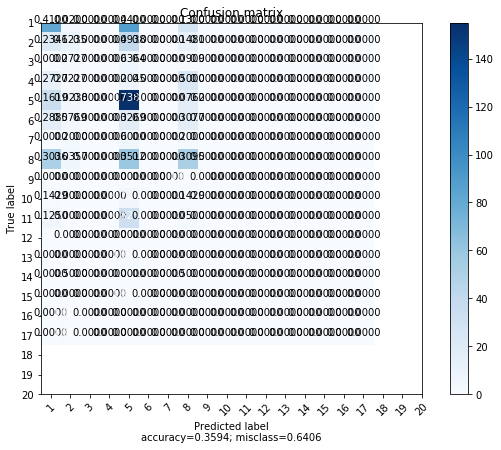

In [27]:
plot_confusion_matrix(cm, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])